In [1]:
#importing libraries that are used in this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix as CM

In [2]:
#importing dataset
dataset = pd.read_excel('1613779-Red_wine_.xlsx')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [3]:
dataset.shape

(1599, 12)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [5]:
# dataset.isnull().any().any() # gives boolen value for whether there is any missing data in whole dataframe
# dataset.isnull().any()       # gives boolen value for whether there is any missing data in dataframe by columns
#dataset.isnull()              # gives boolen value for whether there is any missing data in dataframe by individual values 
dataset.isnull().sum()         # gives number of missing values column-wise

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [6]:
# drop rows with missing values
dataset.dropna(inplace=True)
dataset.shape

(1596, 12)

In [7]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000
mean,8.321366,0.527666,0.271128,2.536936,0.087487,15.882206,46.431078,0.996745,3.498716,0.658189,10.424217,5.636591
std,1.742121,0.179154,0.194847,1.408341,0.047107,10.467380,32.893072,0.001889,0.080297,0.169587,1.066046,0.807963
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996745,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997842,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


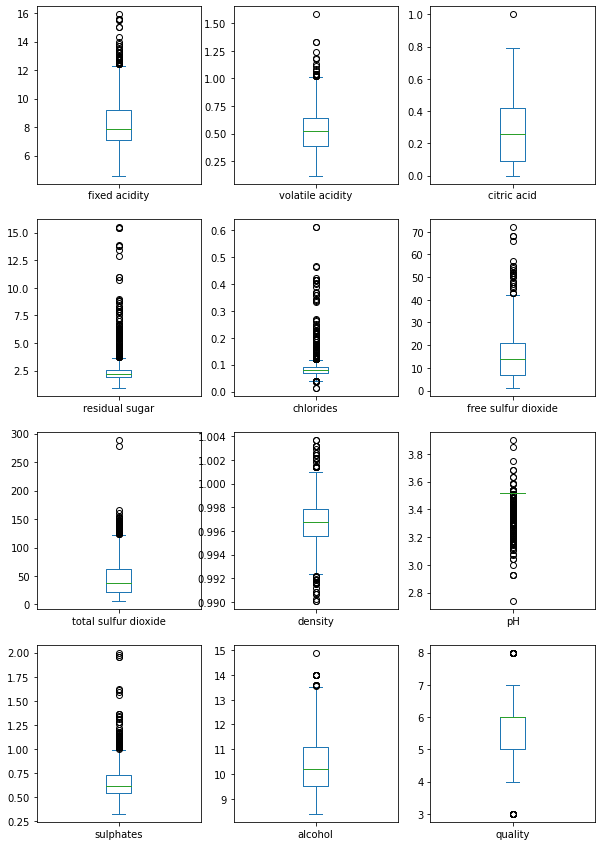

In [8]:
dataset.plot(kind='box', subplots=True, layout=(4,3), figsize=(10,15));

From the above box plots we can clearly see that there are outliers in all features.

We will not remove/modify outliers as we are looking for accuracy to minute levels, not just some approximation — high quality wine may have very rare composition (hence outlier) from other average quality wines, so we cannot remove or modify outlier values in dataset.

In [9]:
dataset.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255955,0.672203,0.115542,0.093517,-0.154348,-0.112605,0.668689,0.026958,0.183046,-0.062419,0.124090
volatile acidity,-0.255955,1.000000,-0.552080,0.002286,0.061452,-0.009960,0.076832,0.021761,-0.046243,-0.260504,-0.201591,-0.390616
citric acid,0.672203,-0.552080,1.000000,0.143201,0.203904,-0.061621,0.034873,0.365526,0.008324,0.312146,0.109062,0.226261
residual sugar,0.115542,0.002286,0.143201,1.000000,0.056236,0.187112,0.201120,0.355219,0.043099,0.004105,0.041798,0.015165
chlorides,0.093517,0.061452,0.203904,0.056236,1.000000,0.005456,0.047837,0.200860,-0.259456,0.371510,-0.221472,-0.129172
free sulfur dioxide,-0.154348,-0.009960,-0.061621,0.187112,0.005456,1.000000,0.668505,-0.021797,-0.025512,0.051200,-0.070222,-0.050656
total sulfur dioxide,-0.112605,0.076832,0.034873,0.201120,0.047837,0.668505,1.000000,0.070830,-0.162984,0.042082,-0.205951,-0.184857
density,0.668689,0.021761,0.365526,0.355219,0.200860,-0.021797,0.070830,1.000000,-0.037144,0.148561,-0.496244,-0.174567
pH,0.026958,-0.046243,0.008324,0.043099,-0.259456,-0.025512,-0.162984,-0.037144,1.000000,-0.260327,0.233510,0.133216
sulphates,0.183046,-0.260504,0.312146,0.004105,0.371510,0.051200,0.042082,0.148561,-0.260327,1.000000,0.092940,0.251798


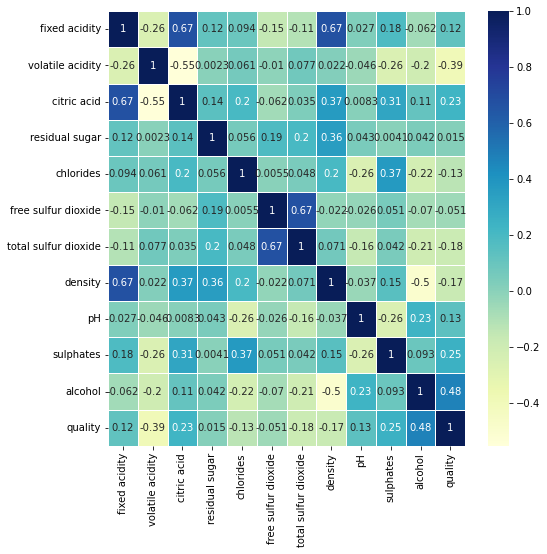

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(dataset.corr(), annot=True, linewidths=0.5, cmap="YlGnBu");

It can be said that two variables are fully correlated if the value of their correlation coefficient is greater than 0.7.

Now lets check for this

In [11]:
1>dataset.corr().values.all()>0.7 | -1<dataset.corr().values.all()< -0.7

False

There is no such correlation in our data.

In [12]:
X = dataset.iloc[:, :-1]
Y = dataset.iloc[:, -1]

In [13]:
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size=0.20, random_state=0)

In [14]:
from sklearn.preprocessing import StandardScaler as ss
SS = ss()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

## Machine Learning Models

Logistic Regression Classification

In [15]:
logisticRegression = LogisticRegression(solver='lbfgs', random_state=0)
logisticRegression.fit(X_train, Y_train)
Y_pred_logisticRegression = logisticRegression.predict(X_test)
Y_compare_logisticRegression = pd.DataFrame({'Actual' : Y_test, 'Predicted' : Y_pred_logisticRegression})
print(Y_compare_logisticRegression.head())
print('\nConfussion matrix:')
print(CM(Y_test, Y_pred_logisticRegression))

      Actual  Predicted
915      6.0        7.0
1033     6.0        6.0
1002     7.0        7.0
490      6.0        5.0
1195     6.0        5.0

Confussion matrix:
[[  0   1   0   0   0]
 [  0   0   5   5   0]
 [  0   0 109  35   0]
 [  0   0  38  76  12]
 [  0   0   3  31   5]]


K-Nearest Neighbour Classification

In [16]:
knn = KNN(n_neighbors=2, metric='minkowski', p=2,)
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
Y_compare_knn = pd.DataFrame({'Actual' : Y_test, 'Predicted' : Y_pred_knn})
print(Y_compare_knn.head())
print('\nConfussion matrix:')
print(CM(Y_test, Y_pred_knn))

      Actual  Predicted
915      6.0        7.0
1033     6.0        6.0
1002     7.0        7.0
490      6.0        6.0
1195     6.0        5.0

Confussion matrix:
[[  0   1   0   0   0   0]
 [  0   2   5   3   0   0]
 [  3   6 113  20   2   0]
 [  2   7  48  60   9   0]
 [  0   0   6  24   8   1]
 [  0   0   0   0   0   0]]


Support Vector Classification

In [17]:
svc = SVC(kernel='rbf', gamma='scale', random_state=0)
svc.fit(X_train, Y_train)
Y_pred_svc = svc.predict(X_test)
Y_compare_svc = pd.DataFrame({'Actual' : Y_test, 'Predicted' : Y_pred_svc})
print(Y_compare_svc.head())
print('\nConfussion matrix:')
print(CM(Y_test, Y_pred_svc))

      Actual  Predicted
915      6.0        7.0
1033     6.0        6.0
1002     7.0        7.0
490      6.0        6.0
1195     6.0        5.0

Confussion matrix:
[[  0   0   1   0   0]
 [  0   0   6   4   0]
 [  0   0 114  30   0]
 [  0   0  38  83   5]
 [  0   0   3  31   5]]


Naive Bayes Classification

In [18]:
nb = GaussianNB()
nb.fit(X_train, Y_train)
Y_pred_nb = nb.predict(X_test)
Y_compare_nb = pd.DataFrame({'Actual' : Y_test, 'Predicted' : Y_pred_nb})
print(Y_compare_nb.head())
print('\nConfussion matrix:')
print(CM(Y_test, Y_pred_nb))

      Actual  Predicted
915      6.0        8.0
1033     6.0        3.0
1002     7.0        8.0
490      6.0        3.0
1195     6.0        8.0

Confussion matrix:
[[ 1  0  0  0  0  0]
 [ 6  1  1  0  0  2]
 [59  4 43  1  0 37]
 [35  3  7  3  0 78]
 [ 6  0  1  0  0 32]
 [ 0  0  0  0  0  0]]


Random Forrest Classification

In [19]:
rfc = RFC(n_estimators=25, criterion='gini', random_state=0,)
rfc.fit(X_train, Y_train)
Y_pred_rfc = rfc.predict(X_test)
Y_compare_rfc = pd.DataFrame({'Actual' : Y_test, 'Predicted' : Y_pred_rfc})
print(Y_compare_rfc.head())
print('\nConfussion matrix:')
print(CM(Y_test, Y_pred_rfc))

      Actual  Predicted
915      6.0        7.0
1033     6.0        6.0
1002     7.0        7.0
490      6.0        6.0
1195     6.0        6.0

Confussion matrix:
[[  0   1   0   0   0]
 [  0   0   7   3   0]
 [  0   0 111  32   1]
 [  0   1  26  92   7]
 [  0   0   2  18  19]]


In [20]:
#K-fold cross validation
modelNames = ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector', 'Naive Bayes', 'Random Forrest']
modelClassifiers = [logisticRegression, knn, svc, nb, rfc]
models = pd.DataFrame({'modelNames' : modelNames, 'modelClassifiers' : modelClassifiers})
counter=0
score=[]
for i in models['modelClassifiers']:
  accuracy = cross_val_score(i, X_train, Y_train, scoring='accuracy', cv=10)
  print('Accuracy of %s Classification model is %.2f' %(models.iloc[counter,0],accuracy.mean()))
  score.append(accuracy.mean())
  counter+=1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Logistic Regression Classification model is 0.60


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Accuracy of K-Nearest Neighbour Classification model is 0.58


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Accuracy of Support Vector Classification model is 0.62
Accuracy of Naive Bayes Classification model is 0.13


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Accuracy of Random Forrest Classification model is 0.67


## Feature Selection (Trial Part)

In [21]:
bins = (3,5.5, 8)
group_names = ['bad', 'good']
dataset['quality'] = pd.cut(dataset['quality'], bins = bins, labels = group_names)
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [22]:
dataset['quality'] = dataset['quality'].map({'bad' : 0, 'good' : 1})
dataset.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
10,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,0


1    854
0    732
Name: quality, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


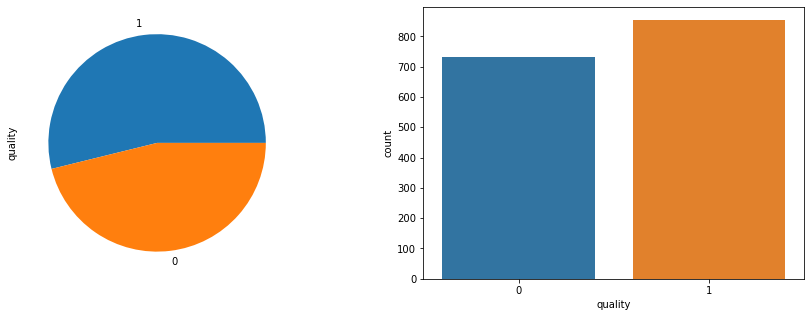

In [23]:
print(dataset['quality'].value_counts())
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15, 5))
ax = ax.flatten()
dataset['quality'].value_counts().plot(x=0, y=1, kind='pie', figsize=(15,5), ax=ax[0])
sns.countplot(dataset['quality'], ax=ax[1])
plt.show()

In [24]:
X = dataset.iloc[:, :-1]
Y = dataset.iloc[:, -1]

In [25]:
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size=0.20, random_state=0)

In [36]:
Y_train.isnull()

645     False
682     False
476     False
393     False
1076    False
        ...  
766     False
838     False
1219    False
562     False
687     False
Name: quality, Length: 1276, dtype: bool

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [ ]:
X_train.shape

In [ ]:
t = 0
for i in X_train:
    if X_train == :
        t=+1
print(t)

## Machine Learning Models

Logistic Regression Classification

In [ ]:
logisticRegression = LogisticRegression(solver='lbfgs', random_state=0)
logisticRegression.fit(X_train, Y_train)
Y_pred_logisticRegression = logisticRegression.predict(X_test)
Y_compare_logisticRegression = pd.DataFrame({'Actual' : Y_test, 'Predicted' : Y_pred_logisticRegression})
print(Y_compare_logisticRegression.head())
print('\nConfussion matrix:')
print(CM(Y_test, Y_pred_logisticRegression))

K-Nearest Neighbour Classification

In [ ]:
knn = KNN(n_neighbors=2, metric='minkowski', p=2,)
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
Y_compare_knn = pd.DataFrame({'Actual' : Y_test, 'Predicted' : Y_pred_knn})
print(Y_compare_knn.head())
print('\nConfussion matrix:')
print(CM(Y_test, Y_pred_knn))

Support Vector Classification

In [ ]:
svc = SVC(kernel='rbf', gamma='scale', random_state=0)
svc.fit(X_train, Y_train)
Y_pred_svc = svc.predict(X_test)
Y_compare_svc = pd.DataFrame({'Actual' : Y_test, 'Predicted' : Y_pred_svc})
print(Y_compare_svc.head())
print('\nConfussion matrix:')
print(CM(Y_test, Y_pred_svc))

Naive Bayes Classification

In [ ]:
nb = GaussianNB()
nb.fit(X_train, Y_train)
Y_pred_nb = nb.predict(X_test)
Y_compare_nb = pd.DataFrame({'Actual' : Y_test, 'Predicted' : Y_pred_nb})
print(Y_compare_nb.head())
print('\nConfussion matrix:')
print(CM(Y_test, Y_pred_nb))

In [ ]:
Random Forrest Classification

In [ ]:
rfc = RFC(n_estimators=25, criterion='gini', random_state=0,)
rfc.fit(X_train, Y_train)
Y_pred_rfc = rfc.predict(X_test)
Y_compare_rfc = pd.DataFrame({'Actual' : Y_test, 'Predicted' : Y_pred_rfc})
print(Y_compare_rfc.head())
print('\nConfussion matrix:')
print(CM(Y_test, Y_pred_rfc))

In [ ]:
#K-fold cross validation
modelNames = ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector', 'Naive Bayes', 'Random Forrest']
modelClassifiers = [logisticRegression, knn, svc, nb, rfc]
models = pd.DataFrame({'modelNames' : modelNames, 'modelClassifiers' : modelClassifiers})
counter=0
score=[]
for i in models['modelClassifiers']:
  accuracy = cross_val_score(i, X_train, Y_train, scoring='accuracy', cv=10)
  print('Accuracy of %s Classification model is %.2f' %(models.iloc[counter,0],accuracy.mean()))
  score.append(accuracy.mean())
  counter+=1